## Interactive Time Series plots using Plotly

In this Example Class, we are going to visualize the time series interactively by the module plotly. 

conda install -c plotly plotly

In [5]:
import pandas as pd
import quandl
import calendar
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Download AAPL - Apple stock price via quandl.

As in the module quandl, we are required to register an account and obtain API key if we want to produce an online version of an interactive graph. Then, we can visit the following link for registration:

https://plot.ly/accounts/login/?action=signup#/

In [7]:
quandl.ApiConfig.api_key = "c8JEo5XxxvJUzqrsxnCk"
mydata = quandl.get_table('WIKI/PRICES', ticker='AAPL')
yrlist = pd.DatetimeIndex(mydata['date']).year
yr5_data = mydata[(yrlist >= 2012) & (yrlist <= 2017)]
yr5_close = yr5_data.loc[:,['date','adj_close']]
ts = yr5_close.set_index('date')

Note that the username and API key information must be provided to produce online interactive graphs. Also, BOTH online and offline iplot methods are imported from plotly. In the followings, we are going to initiate Plotly Notebook mode for offline interactive plot.

In [8]:
init_notebook_mode(connected=True)

For the following interactive graphs, online version can be obtained by simply replacement of iplot by py.iplot. Surely, the username and API key information must be provided in this case.

### Construct the same plot of adjusted closing price by matplotlib.

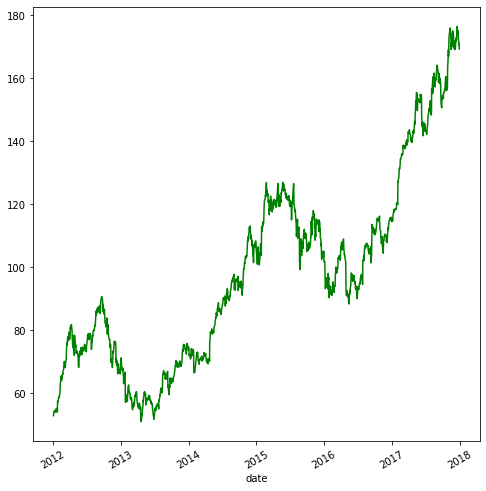

In [9]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation=30)
plt.xlabel('date')
plt.plot(ts['adj_close'], color='g')
plt.show()

### An interactive graph can be produced by simple object conversion.

In [10]:
plotly_fig = tls.mpl_to_plotly(fig)
iplot(plotly_fig)

Alternatively, we can construct an new data object to generate an interactive graph.

In [11]:
data = [go.Scatter(x=mydata.date, y=mydata['adj_close'])]
iplot(data)

### Interactive graph of multiple time series.

As a free user, quandl allows downloading prices of no more than three stocks.

In [12]:
quandl.ApiConfig.api_key = "c8JEo5XxxvJUzqrsxnCk"
mydata = quandl.get_table('WIKI/PRICES', ticker=['AAPL','FB','MSFT'])
yrlist = pd.DatetimeIndex(mydata['date']).year
yr5_data = mydata[(yrlist >= 2012) & (yrlist <= 2019)]

In [13]:
yr5_data

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,MSFT,2018-03-27,94.940,95.1390,88.51,89.47,53704562.0,0.0,1.0,94.940000,95.139000,88.510000,89.470000,53704562.0
1,MSFT,2018-03-26,90.610,94.0000,90.40,93.78,55031149.0,0.0,1.0,90.610000,94.000000,90.400000,93.780000,55031149.0
2,MSFT,2018-03-23,89.500,90.4600,87.08,87.18,42159397.0,0.0,1.0,89.500000,90.460000,87.080000,87.180000,42159397.0
3,MSFT,2018-03-22,91.265,91.7500,89.66,89.79,37578166.0,0.0,1.0,91.265000,91.750000,89.660000,89.790000,37578166.0
4,MSFT,2018-03-21,92.930,94.0500,92.21,92.48,23753263.0,0.0,1.0,92.930000,94.050000,92.210000,92.480000,23753263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AAPL,2016-06-14,97.320,98.4750,96.75,97.46,31931944.0,0.0,1.0,95.109628,96.238395,94.552574,95.246448,31931944.0
9996,AAPL,2016-06-13,98.690,99.1200,97.10,97.34,38020494.0,0.0,1.0,96.448512,96.868746,94.894625,95.129174,38020494.0
9997,AAPL,2016-06-10,98.530,99.3457,98.48,98.83,31712936.0,0.0,1.0,96.292146,97.089320,96.243282,96.585332,31712936.0


In [14]:
AAPL = yr5_data.loc[yr5_data.ticker=='AAPL']
MSFT = yr5_data.loc[yr5_data.ticker=='MSFT']
FB = yr5_data.loc[yr5_data.ticker=='FB']

In [15]:
AAPL

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
9548,AAPL,2018-03-27,173.68,175.1500,166.92,168.340,38962839.0,0.0,1.0,173.680000,175.150000,166.920000,168.340000,38962839.0
9549,AAPL,2018-03-26,168.07,173.1000,166.44,172.770,36272617.0,0.0,1.0,168.070000,173.100000,166.440000,172.770000,36272617.0
9550,AAPL,2018-03-23,168.39,169.9200,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0
9551,AAPL,2018-03-22,170.00,172.6800,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
9552,AAPL,2018-03-21,175.04,175.0900,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AAPL,2016-06-14,97.32,98.4750,96.75,97.460,31931944.0,0.0,1.0,95.109628,96.238395,94.552574,95.246448,31931944.0
9996,AAPL,2016-06-13,98.69,99.1200,97.10,97.340,38020494.0,0.0,1.0,96.448512,96.868746,94.894625,95.129174,38020494.0
9997,AAPL,2016-06-10,98.53,99.3457,98.48,98.830,31712936.0,0.0,1.0,96.292146,97.089320,96.243282,96.585332,31712936.0


In [16]:
trace_FB = go.Scatter(
                x=FB.date,
                y=FB['adj_close'],
                name = "FB Close",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_MSFT = go.Scatter(
                x=MSFT.date,
                y=MSFT['adj_close'],
                name = "MSFT Close",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

trace_AAPL = go.Scatter(
                x=AAPL.date,
                y=AAPL['adj_close'],
                name = "AAPL Close",
                line = dict(color = '#FFA07A'),
                opacity = 0.8)


data = [trace_MSFT, trace_AAPL, trace_FB]

layout = dict(
    title = "Interactive Plot of Daily Closing of MSFT, FB and AAPL",
    xaxis = dict(
        range = ['2017-07-01','2018-03-18'])
)

fig = dict(data=data, layout=layout)
iplot(fig)

### Interactive plot with a range slider.

In [17]:
quandl.ApiConfig.api_key = "c8JEo5XxxvJUzqrsxnCk"
mydata2 = quandl.get_table('WIKI/PRICES', ticker=['GOOG','AMZN'])
yrlist = pd.DatetimeIndex(mydata2['date']).year
yr5_data2 = mydata2[(yrlist >= 2012) & (yrlist <= 2019)]

In [18]:
GOOG = yr5_data2.loc[yr5_data2.ticker=='GOOG']
AMZN = yr5_data2.loc[yr5_data2.ticker=='AMZN']

In [19]:
trace_GOOG = go.Scatter(
                x=GOOG.date,
                y=GOOG['adj_close'],
                name = "GOOG Close",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_AMZN = go.Scatter(
                x=AMZN.date,
                y=AMZN['adj_close'],
                name = "AMZN Close",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_AMZN, trace_GOOG]

layout = dict(
    title='Interactive Plot of Daily Price of AMZN and GOOG with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=3,
                     label='3m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig)

Downloading TSLA - Tesla stock prices.

In [20]:
quandl.ApiConfig.api_key = "c8JEo5XxxvJUzqrsxnCk"
mydata = quandl.get_table('WIKI/PRICES', ticker='TSLA')
yrlist = pd.DatetimeIndex(mydata['date']).year
yr5_data = mydata[(yrlist >= 2012) & (yrlist <= 2019)]
yr5_close = yr5_data.loc[:,['date','adj_close']]
ts = yr5_close.set_index('date')

In [21]:
ts

,adj_close
date,
2018-03-27,279.18
2018-03-26,304.18
2018-03-23,301.54
2018-03-22,309.10
2018-03-21,316.53
...,...
2012-01-09,27.25
2012-01-06,26.91
2012-01-05,27.12


### Construction of boxplot (annual data) by direct usage of iplot method.

In [22]:
# Produce interactive boxplot for annual data
#freq = 'A' means annual
groups = [g for n, g in ts.groupby(pd.Grouper(freq='A'))]
years_val = [list(groups[j]['adj_close']) for j in range(len(groups))]
years_ind = [str(groups[j].index[0].year) for j in range(len(groups))]
for yval in years_val:
     yval[:] = [x for x in yval if x is not None]
data = [go.Box(y=years_val[j], name=years_ind[j]) for j in range(len(years_val))]
iplot(data)

### Construction of boxplot (monthly data) by direct usage of iplot method.

In [23]:
#freq = 'M' means monthly
groups = [g for n, g in ts.groupby(pd.Grouper(freq='M'))]
months_ind = [calendar.month_abbr[groups[j].index[0].month] for j in range(len(groups))]
months_val = [[] for j in range(12)]
for j in range(len(groups)):
    months_val[j % 12].extend(groups[j]['adj_close'])
for mval in months_val:
    mval[:] = [x for x in mval if x is not None]
data = [go.Box(y=months_val[j], name=months_ind[j]) for j in range(len(months_val))]
iplot(data)